In [1]:
from gensim.models import LdaModel
from gensim.models import CoherenceModel
import pickle as pkl
import numpy as np
from tqdm.notebook import tqdm
from pathlib import Path
import matplotlib.pyplot as plt
import time

C:\Users\minha\Anaconda3\lib\site-packages\gensim\similarities\__init__.py:15: UserWarning: The gensim.similarities.levenshtein submodule is disabled, because the optional Levenshtein package <https://pypi.org/project/python-Levenshtein/> is unavailable. Install Levenhstein (e.g. `pip install python-Levenshtein`) to suppress this warning.
  warnings.warn(msg)


In [2]:
#Impostant settings for plotting
from wordcloud import WordCloud
font = {'family' : 'Arial',
         'weight' : 'normal',
         'size'   : 8}
plt.rc('font', **font)

In [3]:
saving_path="C:/Users/minha/Desktop/plots_new/updated/"

In [4]:
#reading necessary inputs for lda from pickle
import pickle as pkl

with open('pickled_1907/data_lemmatized.pkl', 'rb') as f:
    data_lemmatized = pkl.load(f)

with open('pickled_1907/cleaned_corpus.pkl', 'rb') as f:
    corpus = pkl.load(f)
with open("pickled_1907/id2word.pkl", 'rb') as f:
    id2word= pkl.load(f)

In [5]:
#Choosing Number of topics
nTopics =11

In [6]:
# Load model
lda_model = LdaModel.load(f'pickled_1907/trained_models/trained_lda_model_{nTopics}.model')

In [7]:
import pyLDAvis.gensim_models
pyLDAvis.enable_notebook()
vis =pyLDAvis.gensim_models.prepare(lda_model, corpus, id2word)
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
5      0.143233  0.103937       1        1  20.377706
3      0.144159  0.046163       2        1  15.321032
9      0.123149  0.006743       3        1  11.830113
1      0.099581  0.136977       4        1  11.273981
6      0.057960 -0.014885       5        1  11.077421
4      0.074825 -0.047687       6        1  10.788235
0      0.017234 -0.101547       7        1   7.615759
2      0.009265 -0.060958       8        1   5.047077
10    -0.047410 -0.128532       9        1   3.794917
8     -0.274662 -0.200816      10        1   1.743092
7     -0.347334  0.260606      11        1   1.130669, topic_info=          Term          Freq         Total Category  logprob  loglift
109      model  24759.000000  24759.000000  Default  30.0000  30.0000
7        river  19053.000000  19053.000000  Default  29.0000  29.0000
1        flood  31750.000000  31750.000000  Default  28.0000  28.0000
46      change  12625.000000  12625.000000  Default  27.0000  27.0000
42       water  20808.000000  20808.000000  Default  26.0000  26.0000
...        ...           ...           ...      ...      ...      ...
3374  facility     76.256947    215.185618  Topic11  -5.5212   3.4450
359    propose    124.707877   2558.794000  Topic11  -5.0293   1.4610
137      china     94.696747   1594.642735  Topic11  -5.3046   1.6586
420     season     78.736093   1591.341319  Topic11  -5.4892   1.4761
435     volume     77.111593   1675.250741  Topic11  -5.5100   1.4039

[810 rows x 6 columns], token_table=      Topic      Freq         Term
term                              
4915      8  0.988806     ablation
2465      6  0.982220    abundance
2465      7  0.015842    abundance
237       1  0.999123     accuracy
1569      1  0.990571     accurate
...     ...       ...          ...
1106      7  0.460044         zone
1106      8  0.111765         zone
1106      9  0.045158         zone
1106     10  0.039513         zone
2241      6  0.994086  zooplankton

[1893 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[6, 4, 10, 2, 7, 5, 1, 3, 11, 9, 8])

In [ ]:
top

### Wordclouds

In [11]:
#extracting word frequency from LDA
topic_info = vis.topic_info
topic_info = topic_info[topic_info["Category"] != "Default"]
#topic_info 

C:\Users\minha\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


C:\Users\minha\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


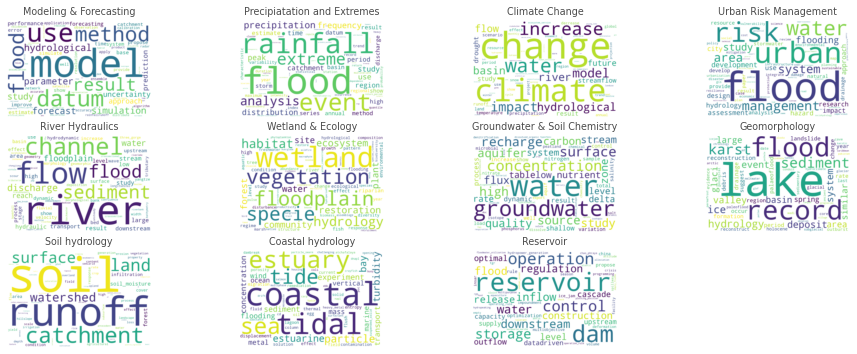

In [38]:
#ploting word cloud for each topic
plt.rcParams['figure.figsize'] = [16, 6]
topic_names = ['Modeling & Forecasting', 'Precipiatation and Extremes', 'Climate Change', 'Urban Risk Management', 
                   'River Hydraulics',"Wetland & Ecology",'Groundwater & Soil Chemistry',"Geomorphology",
                  "Soil hydrology","Coastal hydrology","Reservoir"]
for index,i in enumerate(topic_info["Category"].unique()):
    topic_data=topic_info[topic_info["Category"]==i]
    plot_data = dict(zip(topic_data['Term'].tolist(), topic_data['Freq'].tolist()))
    wc = WordCloud(width=1200, height=800,background_color="white").generate_from_frequencies(plot_data)
    plt.subplot(3,4,index+1)
    #plt.figure(figsize=(10, 10))
    plt.imshow(wc, interpolation='bilinear')
    plt.axis('off')
    plt.title(topic_names[index],alpha=0.7)
#plt.savefig("C:/Users/minha/Desktop/plots/word_cloud2608.jpg",dpi=300,bbox_inches="tight")
plt.savefig(saving_path+"topic_wordclouds_"+ time.strftime("%Y-%m-%d %H%M") + ".png",dpi=150, bbox_inches="tight")

In [12]:
topic_1=topic_info[["Term","Freq"]][topic_info["Category"] == "Topic1"].reset_index(drop=True)
topic_1

C:\Users\minha\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Term,Freq
0,forecast,2935.015409
1,forecasting,2196.080083
2,error,1608.984613
3,accuracy,1320.252222
4,calibration,1276.153075
...,...,...
68,system,1841.104199
69,show,1688.328626
70,well,1534.631092
71,catchment,1657.476833


In [13]:
topic_names = ['Modeling and forecasting', 'Precipiatation and extremes', 'Climate change', 'Urban risk management', 
                   'River hydraulics',"Wetland and ecology",'Groundwater and soil chemistry',"Geomorphology",
                  "Soil hydrology","Coastal hydrology","Reservoir"]

C:\Users\minha\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [14]:
top_words_by_topic =[]
for i,topic in enumerate(topic_info['Category'].unique()):
    topic_x=topic_info[["Term","Freq"]][topic_info["Category"] == topic].reset_index(drop=True).rename(columns={"Term":"Term_"+str(i),"Freq":"Frequency_"+str(i)})
 #   topic_x["Topic name_"+str(i)] = topic_names[i]
    topic_x.sort_values(by="Frequency_"+str(i))
    top_words_by_topic.append(topic_x)

C:\Users\minha\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [16]:
import pandas as pd
df = pd.DataFrame(top_words_by_topic[0],columns=['Term',"Freq","Topic name"])

C:\Users\minha\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [177]:
type(top_words_by_topic[0])

C:\Users\minha\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


pandas.core.frame.DataFrame

In [37]:
df = pd.concat(top_words_by_topic[8:11],axis=1,join='inner',keys=topic_names[8:11])

C:\Users\minha\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [38]:
appendix_1 = df.head(30)
appendix_1

C:\Users\minha\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Soil hydrology             Coastal hydrology              \
                  Term_8 Frequency_8            Term_9 Frequency_9   
0             harvesting   97.756353             tidal  749.632748   
1             compaction   96.380918           estuary  505.125202   
2               cropping   92.593810              tide  371.460393   
3                topsoil   89.358652      displacement  140.212202   
4            cultivation   85.263429               egg  119.173624   
5              macropore   67.327630           entropy  115.396137   
6              cultivate   64.935863          dambreak   80.236099   
7       methane_emission   62.024549                cd   76.960973   
8   carbon_sequestration   58.529799              coli   64.746276   
9             fertilizer   57.426749       atchafalaya   63.018455   
10                arable   70.914393   suspended_solid   62.747911   
11             saltwater   51.419384               poc   62.504671   
12               rewette   48.802062            salmon   56.269380   
13                 boost   46.375783             dnapl   53.084850   
14                   awd   44.354194             drift   48.889036   
15                    df   40.985874                mc   47.964394   
16         fertilization   39.868016              napl   47.542587   
17                   kfs   39.679695    particle_swarm   47.026843   
18                   swc   38.087529        surfactant   45.500714   
19   quantile_regression   37.220340           opening   51.119077   
20                hydric   33.627228              carp   43.699653   
21               cutting   33.463784        multiphase   41.990090   
22                   ley   32.454628          mosquito   41.132416   
23               subsoil   32.397152               ebb   40.895629   
24               tillage   32.300220       challenging   40.433871   
25               aerobic   31.830871          crayfish   40.231119   
26             quickflow   31.457793           housing   40.201203   
27                   ert   30.176143         substance   39.819003   
28             timelapse   29.378550             hatch   39.767910   
29                  rice  232.784621              buoy   37.915572   

                 Reservoir               
                   Term_10 Frequency_10  
0                reservoir  2277.454155  
1               datadriven   149.565562  
2                  ice_jam    91.033142  
3                    insar    76.424800  
4              programming    59.591640  
5    hydropower_generation    53.212791  
6                 spillway    52.035166  
7                   crisis    50.688178  
8                      tgr    46.875011  
9           operating_rule    43.322992  
10                attitude    41.202330  
11            multipurpose    37.632431  
12                   anfis    33.571570  
13                   empty    33.467075  
14             chao_phraya    33.091403  
15            indian_ocean    29.489878  
16          operation_rule    28.758446  
17             aquaculture    27.848629  
18                  sluice    26.556309  
19            hydropeaking    26.293824  
20                tolerant    25.391400  
21  floodwater_utilization    24.124452  
22       plotting_position    24.119599  
23             alleviation    23.488874  
24                   shock    23.196376  
25                     rge    22.989005  
26        macquarie_marshe    21.203219  
27                    huai    20.053466  
28            empty_flushe    19.737990  
29                 plastic    19.431130

In [39]:
print(appendix_1.to_latex(index=False))

\begin{tabular}{lrlrlr}
\toprule
      Soil hydrology & \multicolumn{2}{l}{Coastal hydrology} & \multicolumn{2}{l}{Reservoir} \\
              Term\_8 & Frequency\_8 &            Term\_9 & Frequency\_9 &                Term\_10 & Frequency\_10 \\
\midrule
          harvesting &   97.756353 &             tidal &  749.632748 &              reservoir &  2277.454155 \\
          compaction &   96.380918 &           estuary &  505.125202 &             datadriven &   149.565562 \\
            cropping &   92.593810 &              tide &  371.460393 &                ice\_jam &    91.033142 \\
             topsoil &   89.358652 &      displacement &  140.212202 &                  insar &    76.424800 \\
         cultivation &   85.263429 &               egg &  119.173624 &            programming &    59.591640 \\
           macropore &   67.327630 &           entropy &  115.396137 &  hydropower\_generation &    53.212791 \\
           cultivate &   64.935863 &          dambreak &   80.236099 &

C:\Users\minha\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [151]:
df['g'] = df.groupby('Topic name_0')['T'].cumcount()
df1 = df.set_index(['g','Topic name']).stack().unstack([1,2])
print (df1)


C:\Users\minha\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


ValueError: Grouper for 'Topic name' not 1-dimensional